# Модели по Тинькофф Платинум

## Загрузка данных

In [203]:
%pylab inline

import pandas
import numpy
import sklearn.linear_model
import sklearn.cross_validation
import time
import sys
import sklearn.metrics
import sklearn.ensemble
import sklearn.tree
sc

Populating the interactive namespace from numpy and matplotlib


In [204]:
data = hc.sql('SELECT * FROM tmp.frank_bd_model_apr_features60')
data = data.map(lambda x: (x[1], x[2])).collect()

In [221]:
import sklearn.feature_extraction

labels = []
features = []
for instance in data:
    if len(instance[1]) >= 0:
        labels.append(instance[0])
        features.append(' '.join(instance[1]))

tf_idf = sklearn.feature_extraction.text.TfidfVectorizer()
features = tf_idf.fit_transform(features)
labels = numpy.array(labels)

In [222]:
print features.shape
print labels.shape

(260682, 539832)
(260682,)


## Логистическая регрессия

In [223]:
## LOGISTIC REGRESSION

k_fold = sklearn.cross_validation.KFold(n=features.shape[0], n_folds=5)

test_scores = []
test_predictions = []
test_true_labels = []

train_predictions = []
train_true_labels = []
train_scores = []

for train_idx, test_idx in k_fold:
    features_train = features[train_idx, :]
    features_test = features[test_idx, :]
    labels_train = labels[train_idx]
    labels_test = labels[test_idx]

    log_regression = sklearn.linear_model.LogisticRegression(penalty='l1', C=0.5)
    
    start = time.time()
    log_regression.fit(features_train, labels_train)
    end = time.time()
    print('Fold completed, learning time: ', end - start)
    sys.stdout.flush()
    
    local_test_preds = log_regression.predict(features_test)
    local_test_scores = log_regression.predict_proba(features_test)
    
    local_train_preds = log_regression.predict(features_train)
    local_train_scores = log_regression.predict_proba(features_train)
    
    test_true_labels.append(labels_test)
    test_scores.append(local_test_scores)
    test_predictions.append(local_test_preds)
    
    train_predictions.append(local_train_preds)
    train_true_labels.append(labels_train)
    train_scores.append(local_train_scores)
    
train_scores = numpy.concatenate(train_scores)
train_predictions = numpy.concatenate(train_predictions)
train_true_labels = numpy.concatenate(train_true_labels)
    
test_scores = numpy.concatenate(test_scores)
test_predictions = numpy.concatenate(test_predictions)
test_true_labels = numpy.concatenate(test_true_labels)

('Fold completed, learning time: ', 16.53853487968445)
('Fold completed, learning time: ', 17.931752920150757)
('Fold completed, learning time: ', 19.674695014953613)
('Fold completed, learning time: ', 18.014172077178955)
('Fold completed, learning time: ', 19.0087628364563)


In [224]:
##LOGISTIC REGRESSION SCORES

test_accuracy = sklearn.metrics.accuracy_score(test_true_labels, test_predictions)
test_roc_auc = sklearn.metrics.roc_auc_score(test_true_labels, test_scores[:, 1])
test_precision = sklearn.metrics.precision_score(test_true_labels, test_predictions)
test_recall = sklearn.metrics.recall_score(test_true_labels, test_predictions)

train_accuracy = sklearn.metrics.accuracy_score(train_true_labels, train_predictions)
train_roc_auc = sklearn.metrics.roc_auc_score(train_true_labels, train_scores[:, 1])
train_precision = sklearn.metrics.precision_score(train_true_labels, train_predictions)
train_recall = sklearn.metrics.recall_score(train_true_labels, train_predictions)

print '===Logistic Regression report: train, test ==='
print 'Accuracy:\t%.3f\t%.3f' % (train_accuracy, test_accuracy)
print 'ROC AUC:\t%.3f\t%.3f' % (train_roc_auc, test_roc_auc)
print 'Precision:\t%.3f\t%.3f' % (train_precision, test_precision)
print 'Recall:\t\t%.3f\t%.3f' % (train_recall, test_recall)

===Logistic Regression report: train, test ===
Accuracy:	0.829	0.829
ROC AUC:	0.717	0.704
Precision:	0.662	0.645
Recall:		0.055	0.054


In [225]:
test_roc_curve = sklearn.metrics.roc_curve(test_true_labels, test_scores[:, 1])
test_prc = sklearn.metrics.precision_recall_curve(test_true_labels, test_scores[:, 1])

train_roc_curve = sklearn.metrics.roc_curve(train_true_labels, train_scores[:, 1])
train_prc = sklearn.metrics.precision_recall_curve(train_true_labels, train_scores[:, 1])

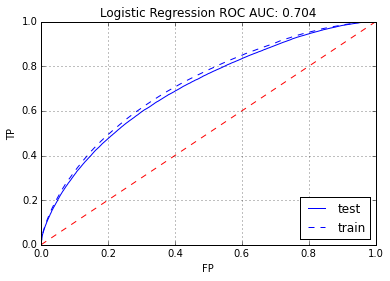

In [226]:
plot(test_roc_curve[0], test_roc_curve[1], '-b')
plot(train_roc_curve[0], train_roc_curve[1], '--b')
plot([1, 0], [1, 0], '--r')
title('Logistic Regression ROC AUC: %.3f' % test_roc_auc)
xlabel('FP')
ylabel('TP')
legend(['test', 'train'],loc='lower right')
grid(True)

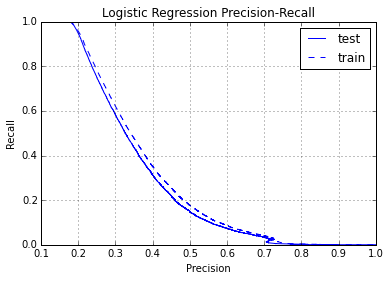

In [227]:
plot(test_prc[0], test_prc[1], '-b')
plot(train_prc[0], train_prc[1], '--b')
title('Logistic Regression Precision-Recall')
xlabel('Precision')
ylabel('Recall')
legend(['test', 'train'])
grid(True)

## Один SGD классификатор

In [188]:
## LOGISTIC REGRESSION

k_fold = sklearn.cross_validation.KFold(n=features.shape[0], n_folds=5)

test_scores = []
test_predictions = []
test_true_labels = []

train_predictions = []
train_true_labels = []
train_scores = []

for train_idx, test_idx in k_fold:
    features_train = features[train_idx, :]
    features_test = features[test_idx, :]
    labels_train = labels[train_idx]
    labels_test = labels[test_idx]

    classifier = sklearn.linear_model.SGDClassifier(loss='log', penalty='l1', alpha=1.0e-5, n_iter=100)
    
    start = time.time()
    classifier.fit(features_train, labels_train)
    end = time.time()
    print('Fold completed, learning time: ', end - start)
    sys.stdout.flush()
    
    local_test_preds = classifier.predict(features_test)
    local_test_scores = classifier.predict_proba(features_test)
    
    local_train_preds = classifier.predict(features_train)
    local_train_scores = classifier.predict_proba(features_train)
    
    test_true_labels.append(labels_test)
    test_scores.append(local_test_scores)
    test_predictions.append(local_test_preds)
    
    train_predictions.append(local_train_preds)
    train_true_labels.append(labels_train)
    train_scores.append(local_train_scores)
    
train_scores = numpy.concatenate(train_scores)
train_predictions = numpy.concatenate(train_predictions)
train_true_labels = numpy.concatenate(train_true_labels)
    
test_scores = numpy.concatenate(test_scores)
test_predictions = numpy.concatenate(test_predictions)
test_true_labels = numpy.concatenate(test_true_labels)

('Fold completed, learning time: ', 43.601691007614136)
('Fold completed, learning time: ', 42.37533497810364)
('Fold completed, learning time: ', 42.70388984680176)
('Fold completed, learning time: ', 42.922348976135254)
('Fold completed, learning time: ', 42.53057599067688)


In [189]:
## SGD scores

test_accuracy = sklearn.metrics.accuracy_score(test_true_labels, test_predictions)
test_roc_auc = sklearn.metrics.roc_auc_score(test_true_labels, test_scores[:, 1])
test_precision = sklearn.metrics.precision_score(test_true_labels, test_predictions)
test_recall = sklearn.metrics.recall_score(test_true_labels, test_predictions)

train_accuracy = sklearn.metrics.accuracy_score(train_true_labels, train_predictions)
train_roc_auc = sklearn.metrics.roc_auc_score(train_true_labels, train_scores[:, 1])
train_precision = sklearn.metrics.precision_score(train_true_labels, train_predictions)
train_recall = sklearn.metrics.recall_score(train_true_labels, train_predictions)

print '===Logistic Regression report: train, test ==='
print 'Accuracy:\t%.3f\t%.3f' % (train_accuracy, test_accuracy)
print 'ROC AUC:\t%.3f\t%.3f' % (train_roc_auc, test_roc_auc)
print 'Precision:\t%.3f\t%.3f' % (train_precision, test_precision)
print 'Recall:\t\t%.3f\t%.3f' % (train_recall, test_recall)

===Logistic Regression report: train, test ===
Accuracy:	0.829	0.829
ROC AUC:	0.715	0.703
Precision:	0.663	0.644
Recall:		0.053	0.052


In [190]:
test_roc_curve = sklearn.metrics.roc_curve(test_true_labels, test_scores[:, 1])
test_prc = sklearn.metrics.precision_recall_curve(test_true_labels, test_scores[:, 1])

train_roc_curve = sklearn.metrics.roc_curve(train_true_labels, train_scores[:, 1])
train_prc = sklearn.metrics.precision_recall_curve(train_true_labels, train_scores[:, 1])

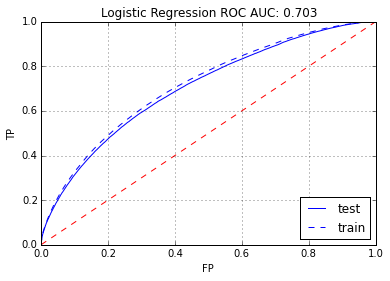

In [191]:
plot(test_roc_curve[0], test_roc_curve[1], '-b')
plot(train_roc_curve[0], train_roc_curve[1], '--b')
plot([1, 0], [1, 0], '--r')
title('Logistic Regression ROC AUC: %.3f' % test_roc_auc)
xlabel('FP')
ylabel('TP')
legend(['test', 'train'],loc='lower right')
grid(True)

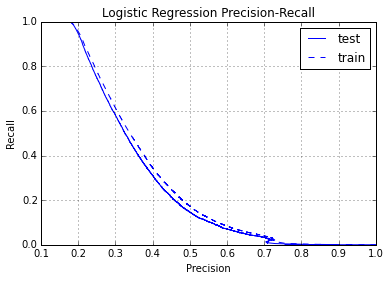

In [192]:
plot(test_prc[0], test_prc[1], '-b')
plot(train_prc[0], train_prc[1], '--b')
title('Logistic Regression Precision-Recall')
xlabel('Precision')
ylabel('Recall')
legend(['test', 'train'])
grid(True)

## AdaBoost на SGD классификаторах

In [114]:
## LOGISTIC REGRESSION

k_fold = sklearn.cross_validation.KFold(n=features.shape[0], n_folds=5)

test_scores = []
test_predictions = []
test_true_labels = []

train_predictions = []
train_true_labels = []
train_scores = []

for train_idx, test_idx in k_fold:
    features_train = features[train_idx, :]
    features_test = features[test_idx, :]
    labels_train = labels[train_idx]
    labels_test = labels[test_idx]

    classifier = sklearn.linear_model.SGDClassifier(loss='log', penalty='l1', alpha=0.00001, n_iter=100)
    
    start = time.time()
    classifier.fit(features_train, labels_train)
    end = time.time()
    print('Fold completed, learning time: ', end - start)
    sys.stdout.flush()
    
    local_test_preds = classifier.predict(features_test)
    local_test_scores = classifier.predict_proba(features_test)
    
    local_train_preds = classifier.predict(features_train)
    local_train_scores = classifier.predict_proba(features_train)
    
    test_true_labels.append(labels_test)
    test_scores.append(local_test_scores)
    test_predictions.append(local_test_preds)
    
    train_predictions.append(local_train_preds)
    train_true_labels.append(labels_train)
    train_scores.append(local_train_scores)
    
train_scores = numpy.concatenate(train_scores)
train_predictions = numpy.concatenate(train_predictions)
train_true_labels = numpy.concatenate(train_true_labels)
    
test_scores = numpy.concatenate(test_scores)
test_predictions = numpy.concatenate(test_predictions)
test_true_labels = numpy.concatenate(test_true_labels)

Fold completed, learning time:  17119.5703909
Fold completed, learning time:  8218.94736314
Fold completed, learning time:  8205.17810011
Fold completed, learning time:  8224.0753839
Fold completed, learning time:  8228.09467983


In [115]:
## AdaBoost scores

accuracy = sklearn.metrics.accuracy_score(true_labels, predictions)
roc_auc = sklearn.metrics.roc_auc_score(true_labels, scores[:, 1])
precision = sklearn.metrics.precision_score(true_labels, predictions)
recall = sklearn.metrics.recall_score(true_labels, predictions)

print '===Logistic Regression report: ==='
print 'Accuracy: ', accuracy
print 'ROC AUC: ', roc_auc
print 'Precision: ', precision
print 'Recall: ', recall

===Logistic Regression report: ===
Accuracy:  0.82838477532
ROC AUC:  0.703518244397
Precision:  0.635480288728
Recall:  0.0500732833111


In [116]:
roc_curve = sklearn.metrics.roc_curve(true_labels, scores[:, 1])
prc = sklearn.metrics.precision_recall_curve(true_labels, scores[:, 1])

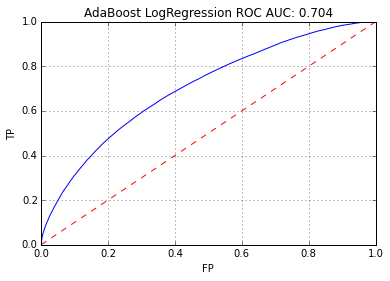

In [119]:
plot(roc_curve[0], roc_curve[1], '-b')
plot([1, 0], [1, 0], '--r')
title('AdaBoost LogRegression ROC AUC: %.3f' % test_roc_auc)
xlabel('FP')
ylabel('TP')
grid(True)

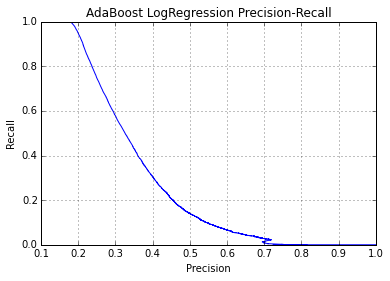

In [120]:
plot(prc[0], prc[1], '-b')
title('AdaBoost LogRegression Precision-Recall')
xlabel('Precision')
ylabel('Recall')
grid(True)

In [2]:
sc.stop()